In [1]:
import pandas as pd
df= pd.read_csv("NEW_Keywords_advisor.csv")
df

,index,selftext,num_comments,score,title,type
0,273,***Seek advice or money management resources**...,0,1,Isn't it time for you to make a plan in managi...,Adult
1,779,I also thought about reaching out to a financi...,6,1,Where to begin? Wanting to buy a home.,Adult
2,1405,Guys lie about their age.People using phising ...,5,3,How to become more street smart with limited e...,Adult
3,1576,I met with my advisor and picked out some clas...,0,9,Victories over my mental health I’d like to share,Adult
4,4145,"First it was because it was overwhelming, then...",14,1,I'm 26F and thinking about going back to school,Adult
...,...,...,...,...,...,...
530,29282,"Hi, a family friend of ours who works as a fin...",18,1,Fee based on % of investment portfolio question,Finance
531,29329,But a financial advisor has pointed out to me ...,13,1,Max out backdoor ROTH every year or just low t...,Finance
532,29437,My financial advisor recommended more LTD cove...,2,1,Long Term Disability Insurance,Finance
533,751,I’m meeting with my advisor and gonna take of ...,4,1,Follow up post about leaving school/changing m...,Adult


In [2]:
import re
def remove_other(x):
    x = re.sub("\$"," ", x) #remove $
    x = re.sub("https*\S+", " ", x) #remove url
    #x = re.sub("\'\w+", '', x) #remove i'm,we're,let's after the '
    #x = re.sub("[0-9]+", '', x) #remove numbers
    x = x.encode('ascii', 'ignore').decode()
    return x

In [3]:
from nltk.stem import WordNetLemmatizer
def lemmatize(words):
    lemmatizer = WordNetLemmatizer()
    nwords=[]
    for word in words:
        word=lemmatizer.lemmatize(word)
        nwords.append(word)
    return ' '.join(nwords)

In [4]:
df['selftext']=df['selftext'].apply(lambda x: remove_other(x))
df['selftext']= df['selftext'].str.split().apply(lambda x: lemmatize(x))
df['selftext']

0      ***Seek advice or money management resources**...
1      I also thought about reaching out to a financi...
2      Guys lie about their age.People using phising ...
3      I met with my advisor and picked out some clas...
4      First it wa because it wa overwhelming, then b...
                             ...                        
530    Hi, a family friend of ours who work a a finan...
531    But a financial advisor ha pointed out to me t...
532    My financial advisor recommended more LTD cove...
533    Im meeting with my advisor and gonna take of l...
534    So yesterday, I wa meeting with a faculty advi...
Name: selftext, Length: 535, dtype: object

In [5]:
X=pd.DataFrame({'text':df['selftext']})
X = X.dropna().reset_index()
X

,index,text
0,0,***Seek advice or money management resources**...
1,1,I also thought about reaching out to a financi...
2,2,Guys lie about their age.People using phising ...
3,3,I met with my advisor and picked out some clas...
4,4,"First it wa because it wa overwhelming, then b..."
...,...,...
530,530,"Hi, a family friend of ours who work a a finan..."
531,531,But a financial advisor ha pointed out to me t...
532,532,My financial advisor recommended more LTD cove...
533,533,Im meeting with my advisor and gonna take of l...


In [6]:
#from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
#analyzer=‘char_wb’
vec=TfidfVectorizer(min_df=0.01,stop_words='english',ngram_range=(1,2))
counts=vec.fit_transform(X['text'])
counts=counts.toarray()
count_df1=pd.DataFrame(counts,columns=vec.get_feature_names())
count_df1=count_df1.drop(['amp','don'],axis=1)
count_df1

,000,10,100,15,20,2020,30,401k,40k,500,...,week,wife,wondering,work,working,worth,year,year ago,years,yield
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.236199,0.0,0.0,0.000000,0.0,0.000000,0.0
531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.445154,0.0,0.318192,0.0
532,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.497738,0.0,0.0,0.000000,0.0,0.000000,0.0
533,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0


In [10]:
from sklearn.decomposition import NMF

model1=NMF(n_components=2,init="random",random_state=0)
model1.fit(count_df1)
#model1.components_

NMF(init='random', n_components=2, random_state=0)

In [11]:
import numpy as np
def top_words(X, model, component, num_words):
    """
    Extract the top words from the specified component 
    for a topic model trained on data. 
    X: a term-document matrix, assumed to be a pd.DataFrame
    model: a sklearn model with a components_ attribute, e.g. NMF
    component: the desired component, specified as an integer. 
        Must be less than than the total number of components in model
    num_words: the number of words to return.
    """
    orders = np.argsort(model.components_, axis = 1)
    important_words = np.array(X.columns)[orders]
    return important_words[component][-num_words:]

In [12]:
topic1=pd.DataFrame({'Topic 0':top_words(count_df1, model1, 0, 10),
                   'Topic 1':top_words(count_df1, model1, 1, 10)})
topic1

,Topic 0,Topic 1
0,money,robo advisor
1,bank,money
2,know,ira
3,investment,just
4,advice,wa
5,worth,robo
6,im,year
7,advisor,tax
8,financial advisor,account
9,financial,advisor


Topic 0: financial advisor worth/bank/investment \
Topic 1: robo advisor/tax 

In [13]:
W=model1.fit_transform(count_df1)
L=[]
for i in W:
    L.append(i.argmax())
X['topic']=L
t0=X[X.topic==0]
t1=X[X.topic==1]

## Compare Emotion across topics

In [14]:
def sent_df(df):
    from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
    import my_module
    import importlib
    importlib.reload(my_module)

    #create a list of dictionaries
    sia = SIA()
    results = []
    words=[]

    for line in df['text']:
        D,pol_score=my_module.polarity_scores(sia,text=line) #use customized module
        pol_score['text'] = line
        results.append(pol_score)
        words.append(D)
    #Extract sentiment words
    D_p=[] # positive word and its sentiment score
    D_n=[] # negative word and its sentiment score
    D1=[] # only positive word
    D2=[] # only negative word
    for i in range(len(words)):
        newDict = {key: value for (key, value) in words[i].items() if value != 0.0 }
        newDict1 = {key: value for (key, value) in words[i].items() if value > 0.0 }
        newDict2 = {key: value for (key, value) in words[i].items() if value < 0.0 }
        D_p.append(newDict1)
        D_n.append(newDict2)
        D1.append(list(newDict1.keys()))
        D2.append(list(newDict2.keys()))
    #create a df to write in the results of sentiment analysis
    sent = pd.DataFrame(results)
    sent['p_word_dict']=D_p
    sent['n_word_dict']=D_n
    p=[]
    n=[]
    for i in D1:
        p.append(' '.join(i))
    for i in D2:
        n.append(' '.join(i))
    sent['total']=(sent.pos-sent.neg)/sent.neu    
    sent['p_word']=p
    sent['n_word']=n
    sent['label']=0
    sent['label'].loc[sent['total']> 0]=1
    sent['label'].loc[sent['total']< 0]=-1
    return sent

In [15]:
a=sent_df(t0)
a['topic']=0

b=sent_df(t1)
b['topic']=1


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [17]:
final=pd.concat([a,b],axis=0)
final.total.describe()

count    534.000000
mean       0.076209
std        0.153651
min       -0.477105
25%        0.000000
50%        0.052632
75%        0.156069
max        0.984127
Name: total, dtype: float64

In [19]:
b.total.describe()

count    301.000000
mean       0.076683
std        0.155097
min       -0.470588
25%        0.000000
50%        0.061078
75%        0.142857
max        0.984127
Name: total, dtype: float64

[Text(0, 0.5, 'Sentiment Score'), Text(0.5, 1.0, 'Sentiment Score by topics')]

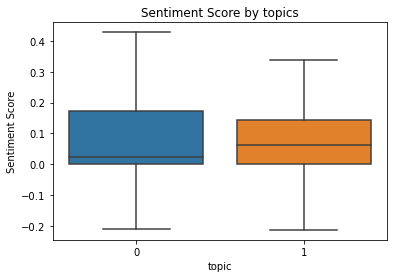

In [20]:
import seaborn as sns
ax = sns.boxplot(x="topic", y="total", data=final,showfliers = False)
ax.set(ylabel="Sentiment Score",title="Sentiment Score by topics")

## Most common positive/negative words

In [57]:
def sort_pn(df):
    positive=df.p_word[df['label']==1] #positive words in positive post
    negative=df.n_word[df['label']==-1] #negative words in negative post
    return positive,negative

In [58]:
import itertools
import collections
def count_words(text):
    all_words = list(itertools.chain(*text.str.split()))
    counts = collections.Counter(all_words)
    counts_df = pd.DataFrame(counts.most_common(100),
                            columns=['words', 'count'])

    return counts_df

In [59]:
positive,negative=sort_pn(final)
p_n=pd.concat([count_words(positive)[:5],count_words(negative)[:5]])
p_n

,words,count
0,like,55
1,ha,50
2,good,36
3,want,32
4,help,28
0,no,16
1,sure,8
2,pay,7
3,lower,6
4,want,4


In [60]:
positive,negative=sort_pn(a)
p_n=pd.concat([count_words(positive)[:5],count_words(negative)[:5]])
p_n

,words,count
0,like,22
1,good,14
2,ha,14
3,help,11
4,worth,10
0,no,8
1,sure,5
2,pay,3
3,lower,3
4,unfortunately,2


In [61]:
positive,negative=sort_pn(b)
p_n=pd.concat([count_words(positive)[:5],count_words(negative)[:5]])
p_n

,words,count
0,ha,36
1,like,33
2,want,25
3,good,22
4,better,17
0,no,8
1,pay,4
2,trouble,3
3,sure,3
4,debt,3


## Word Frequency splitted by sentiment

In [62]:
from nltk.corpus import stopwords
#nltk.download("stopwords") #uncomment it when run it for the first time
stop_words = set(stopwords.words("english"))

stop_words.update({'would','k','im','could','also',
                   'amp','much','one','like','get',
                   'since','etc','got','always',
                   'know','thing','really','dont',
                   'find','even','go','time','need','want'
                  })
def remove_stopwords(text):
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text

final['text']=final['text'].apply(lambda x: remove_stopwords(x))

In [63]:
from nltk.util import ngrams
def count_2gram(text):
    all_words = list(itertools.chain(*text.str.split()))
    es2grams = ngrams(all_words, 2)
    counts = collections.Counter(es2grams)
    count_df = pd.DataFrame(counts.most_common(100),
                            columns=['words', 'count'])
    dictionary2 = [' '.join(tup) for tup in count_df.words]
    count_df.words=dictionary2

    return count_df

In [64]:
final.total.describe()

count    534.000000
mean       0.076209
std        0.153651
min       -0.477105
25%        0.000000
50%        0.052632
75%        0.156069
max        0.984127
Name: total, dtype: float64

In [65]:
def pn_freq(df):
    count_p=count_2gram(df['text'][df['label']>0.156069]) #>0.109797 #==1
    count_n=count_2gram(df['text'][df['label']<0]) #<-0.001208 #==-1
    return count_p,count_n

p,n=pn_freq(final)
p.head(10),n.head(10)

(                words  count
 0   financial advisor    142
 1                I wa     23
 2  financial advisor,     19
 3  financial advisor.     17
 4         I financial     15
 5          advisor ha     15
 6         tax advisor     12
 7           advisor I     10
 8          advisor. I     10
 9            Roth IRA     10,
                 words  count
 0   financial advisor     39
 1  financial advisor,      9
 2        robo advisor      6
 3         I financial      5
 4  financial advisor.      5
 5           advisor I      5
 6             I never      4
 7               I pay      4
 8       Government, [      4
 9          advisor. I      3)

In [31]:
p,n=pn_freq(final[final.topic==0])
p.head(10),n.head(10)

(                words  count
 0   financial advisor    103
 1  financial advisor,     15
 2         I financial     13
 3  financial advisor.     11
 4           advisor I      5
 5              I feel      5
 6          advisor ha      5
 7  financial advisor?      5
 8                 I I      4
 9     speak financial      4,
                 words  count
 0   financial advisor     31
 1  financial advisor,      6
 2         I financial      5
 3             I never      4
 4  financial advisor.      4
 5          advisor. I      3
 6           advisor I      3
 7         idea start.      2
 8       hesitant make      2
 9               I pay      2)

In [32]:
p,n=pn_freq(final[final.topic==1])
p.head(10),n.head(10)

(               words  count
 0  financial advisor     39
 1               I wa     19
 2        tax advisor     12
 3         advisor ha     10
 4           Roth IRA      9
 5      stock advisor      8
 6       capital gain      8
 7            I think      7
 8           I'm sure      6
 9         advisor. I      6,
                 words  count
 0   financial advisor      8
 1        robo advisor      6
 2       Government, [      4
 3  financial advisor,      3
 4            try make      2
 5            try sign      2
 6           money put      2
 7  investment advisor      2
 8        stock market      2
 9           [ \---And      2)

## Topic Modeling after sentiment splitting

In [34]:
final.total.describe()

count    534.000000
mean       0.076209
std        0.153651
min       -0.477105
25%        0.000000
50%        0.052632
75%        0.156069
max        0.984127
Name: total, dtype: float64

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer(min_df=0.01,stop_words='english',ngram_range=(1,2))
counts=vec.fit_transform(final['text'][final['label']>0.156069]) #positive
counts=counts.toarray()
count_df1=pd.DataFrame(counts,columns=vec.get_feature_names())
#count_df1=count_df1.drop(['amp','don'],axis=1)
count_df1

,10,100,12,20,2000,2020,30,401k,40k,500,...,work,working,worth,x200b,year,year ago,yearly,years,yes,yield
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.170257,0.0,0.0,...,0.0,0.0,0.0,0.0,0.114471,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.153325,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
306,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
307,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.508413,0.0,0.0,0.378092,0.0,0.0


In [36]:
from sklearn.decomposition import NMF

model1=NMF(n_components=3,init="random",random_state=1)
model1.fit(count_df1)

NMF(init='random', n_components=3, random_state=1)

In [38]:
topic2=pd.DataFrame({'Topic 0':top_words(count_df1, model1, 0, 10),
                   'Topic 1':top_words(count_df1, model1, 1, 10)})
topic2
# 'Topic 4':top_words(count_df1, model1, 4, 10),
#                     'Topic 5':top_words(count_df1, model1, 5, 10)

,Topic 0,Topic 1
0,advice,robo advisor
1,bank,roth
2,good,ha
3,plan,robo
4,feel,fund
5,worth,wa
6,money,ira
7,advisor,year
8,financial advisor,advisor
9,financial,account


pay house/loan/car \
retirement \
credit card \
school friend feel

In [39]:
vec=TfidfVectorizer(min_df=0.01,stop_words='english',ngram_range=(1,2))
counts=vec.fit_transform(final['text'][final['label']<0]) #negative
counts=counts.toarray()
count_df2=pd.DataFrame(counts,columns=vec.get_feature_names())
#count_df1=count_df1.drop(['amp','don'],axis=1)
count_df2

,000,000 purchase,000 stock,000 year,000into,000into 401k,10,10 40k,10 considering,10 tech,...,yesterday wa,yield,yield 1st,younger,younger female,youre,youre damn,youre degree,zealand,zealand government
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
95,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,0.0,0.0,0.0,0.0,0.0,0.0,0.161214,0.175719,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
model2=NMF(n_components=3,init="random",random_state=0)
model2.fit(count_df2)

NMF(init='random', n_components=3, random_state=0)

In [41]:
topic3=pd.DataFrame({'Topic 0':top_words(count_df2, model2, 0, 10),
                   'Topic 1':top_words(count_df2, model2, 1, 10)})
topic3

,Topic 0,Topic 1
0,mistakenly,lower
1,opened roth,idea
2,2020 family,money
3,2020,sure
4,statefarm,year
5,affiliated statefarm,wa
6,affiliated,tax
7,advisor affiliated,advisor
8,ira june,financial advisor
9,june 2020,financial


live home/parent \
credit card and insurance \
retirement \
parent talking

## Find all adj. related to parent

In [42]:
from nltk.tokenize import sent_tokenize
#nltk.download('punkt')
sentence=df['selftext'].apply(lambda x: sent_tokenize(x))

In [43]:
def extract_parent(sentence_ele):
    L=[]
    for i in sentence_ele:
        if 'advisor' in i: 
            L.append(i)
    return L

In [44]:
parent_sentence=sentence.apply(lambda x: extract_parent(x))
' '.join(parent_sentence[0])

'***Seek advice or money management resources*** For the best track of your financial plan, it better to ensure you seek help from a financial advisor so that you wouldnt miss the tiny detail that could significantly affect your plan.'

In [45]:
parent_sentence[0]

['***Seek advice or money management resources*** For the best track of your financial plan, it better to ensure you seek help from a financial advisor so that you wouldnt miss the tiny detail that could significantly affect your plan.']

In [47]:
import nltk
tokens=nltk.word_tokenize(parent_sentence[0][0])
print(tokens)

['*', '*', '*', 'Seek', 'advice', 'or', 'money', 'management', 'resources', '*', '*', '*', 'For', 'the', 'best', 'track', 'of', 'your', 'financial', 'plan', ',', 'it', 'better', 'to', 'ensure', 'you', 'seek', 'help', 'from', 'a', 'financial', 'advisor', 'so', 'that', 'you', 'wouldnt', 'miss', 'the', 'tiny', 'detail', 'that', 'could', 'significantly', 'affect', 'your', 'plan', '.']


In [48]:
nltk.pos_tag(tokens)

[('*', 'JJ'),
 ('*', 'NNP'),
 ('*', 'NNP'),
 ('Seek', 'NNP'),
 ('advice', 'NN'),
 ('or', 'CC'),
 ('money', 'NN'),
 ('management', 'NN'),
 ('resources', 'NNS'),
 ('*', 'VBP'),
 ('*', 'JJ'),
 ('*', 'NN'),
 ('For', 'IN'),
 ('the', 'DT'),
 ('best', 'JJS'),
 ('track', 'NN'),
 ('of', 'IN'),
 ('your', 'PRP$'),
 ('financial', 'JJ'),
 ('plan', 'NN'),
 (',', ','),
 ('it', 'PRP'),
 ('better', 'JJR'),
 ('to', 'TO'),
 ('ensure', 'VB'),
 ('you', 'PRP'),
 ('seek', 'VBP'),
 ('help', 'NN'),
 ('from', 'IN'),
 ('a', 'DT'),
 ('financial', 'JJ'),
 ('advisor', 'NN'),
 ('so', 'IN'),
 ('that', 'IN'),
 ('you', 'PRP'),
 ('wouldnt', 'VBP'),
 ('miss', 'VB'),
 ('the', 'DT'),
 ('tiny', 'JJ'),
 ('detail', 'NN'),
 ('that', 'WDT'),
 ('could', 'MD'),
 ('significantly', 'RB'),
 ('affect', 'VB'),
 ('your', 'PRP$'),
 ('plan', 'NN'),
 ('.', '.')]

In [49]:
#nltk.download('averaged_perceptron_tagger')
def extract_adj(sentence_ele):
    adjs=[]
    for i in sentence_ele:
        tokens=nltk.word_tokenize(i)
        df_type=pd.DataFrame(nltk.pos_tag(tokens),columns=['words', 'type'])
        adjs=list(df_type[df_type.type=='JJ'].words)
    return ' '.join(adjs)

In [50]:
adjs=parent_sentence.apply(lambda x: extract_adj(x))

In [51]:
adjs

0                           * * financial financial tiny
1                                         financial sure
2      social engineering.People multi fake fake fina...
3                                                   next
4                                          single nearby
                             ...                        
530                      financial large national entire
531                                        financial low
532                            financial valuable assert
533                                                     
534                                                     
Name: selftext, Length: 535, dtype: object

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer(max_df=0.5,min_df=0.01,stop_words='english',ngram_range=(1,2))
counts=vec.fit_transform(adjs)
counts=counts.toarray()
count_df1=pd.DataFrame(counts,columns=vec.get_feature_names())
#count_df1=count_df1.drop(['amp','don'],axis=1)
count_df1

,able,advisory,big,current,different,fiduciary,financial financial,financial good,free,general,...,new,non,personal,possible,real,robo,small,sure,worth,worth financial
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
532,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
533,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
from sklearn.decomposition import NMF

model1=NMF(n_components=3,init="random",random_state=0)
model1.fit(count_df1)

NMF(init='random', n_components=3, random_state=0)

In [54]:
topic1=pd.DataFrame({'Topic 0':top_words(count_df1, model1, 0, 10),
                   'Topic 1':top_words(count_df1, model1, 1, 10),
                   'Topic 2':top_words(count_df1, model1, 2, 10)})
topic1

,Topic 0,Topic 1,Topic 2
0,personal,big,worth
1,general,able,free
2,non,advisory,interested
3,small,individual,personal
4,advisory,free,possible
5,real,fiduciary,new
6,worth,mutual,advisory
7,able,good financial,mutual
8,new,financial good,current
9,sure,good,long


In [55]:
# List of all words across rows
import itertools
import collections
def count_words(text):
    all_words = list(itertools.chain(*text.str.split()))
    counts = collections.Counter(all_words)
    counts_df = pd.DataFrame(counts.most_common(100),
                            columns=['words', 'count'])

    return counts_df
count_words(adjs).head(20)

,words,count
0,financial,275
1,good,36
2,*,26
3,few,23
4,other,23
5,sure,20
6,new,19
7,own,14
8,able,14
9,worth,13


In [56]:
stop_words.update({'i','*','im','’','much'})
adjs=adjs.apply(lambda x: remove_stopwords(x))
count_df=count_words(adjs)
count_df.head(10)

,words,count
0,financial,275
1,good,36
2,sure,20
3,new,19
4,able,14
5,worth,13
6,advisory,11
7,free,11
8,long,11
9,next,10
